<a href="https://colab.research.google.com/github/Magaton1010/Python_Analysis/blob/main/KMeans_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import the K-Means library**

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


**loading the data**

In [7]:
from google.colab import files
uploaded = files.upload()

Saving test-csv.csv to test-csv (1).csv


In [10]:
data= pd.read_csv("test-csv.csv")
data.head(2)

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola


in the documentation of the K-Means, we have that unlike scatter which wants two one-dimensional arrays. Unfortunately, K-Means wants a different shape of the data. So, we're back into another one of these problems where we've got the data in one shape and we want to get it into another shape. Luckily, NumPy is going to come to the rescue again and help us with its column stack function.


In [87]:
income_happy=np.column_stack((data['avg_income'],data['happyScore']))
km_res=KMeans(n_clusters=6,algorithm='elkan').fit(income_happy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
clusters = km_res.cluster_centers_

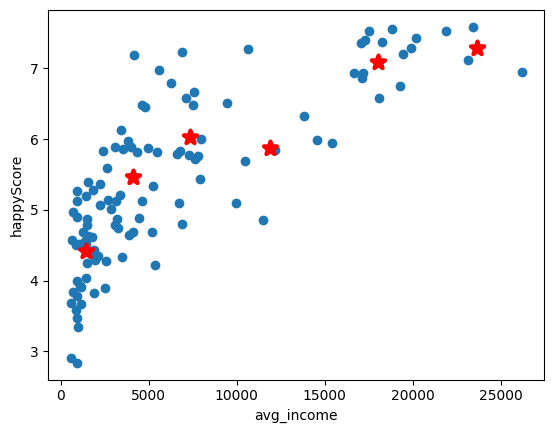

In [89]:
import matplotlib.pyplot as plt
plt.scatter(data['avg_income'],data['happyScore'])
plt.scatter(clusters[:,0],clusters[:,1],color='red',s=100,zorder=10,marker='*',linewidths=3)
plt.xlabel('avg_income')
plt.ylabel('happyScore')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

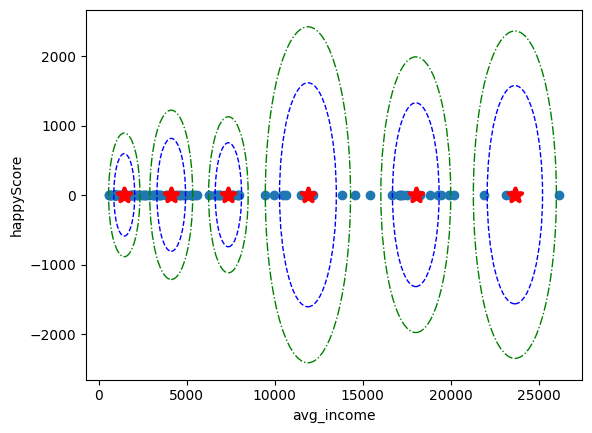

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Assuming 'data', 'clusters', and 'kmeans' (KMeans model) are defined

plt.scatter(data['avg_income'], data['happyScore'])
plt.scatter(clusters[:, 0], clusters[:, 1], color='red', s=100, zorder=10, marker='*', linewidths=3)

# Calculate distances from data points to cluster centers
distances = cdist(data[['avg_income', 'happyScore']], clusters)

# Assign cluster labels to data points
labels = np.argmin(distances, axis=1)

# For each cluster, calculate std deviation and plot boundary
for i in range(len(clusters)):
    # Get data points belonging to the current cluster
    cluster_data = data[['avg_income', 'happyScore']][labels == i]

    # Calculate center and standard deviation
    center = clusters[i]
    # Calculate the mean standard deviation for both columns
    std_dev = np.mean(np.std(cluster_data))

    # Plot boundary for 2 standard deviations
    circle2 = plt.Circle(center, 2 * std_dev, color='blue', fill=False, linestyle='--')
    plt.gca().add_patch(circle2)

    # Plot boundary for 3 standard deviations
    circle3 = plt.Circle(center, 3 * std_dev, color='green', fill=False, linestyle='-.')
    plt.gca().add_patch(circle3)

plt.xlabel('avg_income')
plt.ylabel('happyScore')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=ax

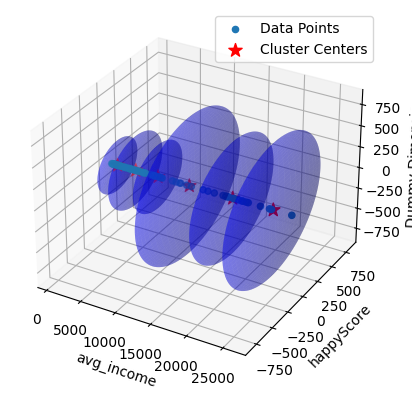

,Country,Cluster
0,Armenia,4
1,Angola,4
2,Argentina,2
3,Austria,1
4,Australia,1
...,...,...
106,Uruguay,2
107,Vietnam,4
108,South Africa,0
109,Zambia,4


In [91]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data', 'clusters', and 'kmeans' (KMeans model) are defined

# Create a dummy third dimension for visualization purposes
z = np.random.rand(len(data['avg_income']))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['avg_income'], data['happyScore'], z, label='Data Points')
ax.scatter(clusters[:, 0], clusters[:, 1], np.zeros(len(clusters)), color='red', s=100, marker='*', label='Cluster Centers')

# Calculate distances and labels as before
distances = cdist(data[['avg_income', 'happyScore']], clusters)
labels = np.argmin(distances, axis=1)

# For each cluster, calculate std deviation and plot boundary (represented as a sphere in 3D)
for i in range(len(clusters)):
    cluster_data = data[['avg_income', 'happyScore']][labels == i]
    center = clusters[i]
    std_dev = np.mean(np.std(cluster_data))

    # Create a sphere for the boundary
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = std_dev * np.outer(np.cos(u), np.sin(v)) + center[0]
    y = std_dev * np.outer(np.sin(u), np.sin(v)) + center[1]
    z = std_dev * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, color='blue', alpha=0.3)

ax.set_xlabel('avg_income')
ax.set_ylabel('happyScore')
ax.set_zlabel('Dummy Dimension')
ax.legend()
plt.show()
# Create a DataFrame for the table
cluster_table = pd.DataFrame({'Country': data['country'], 'Cluster': labels})

# Print the table or display it using display()
cluster_table

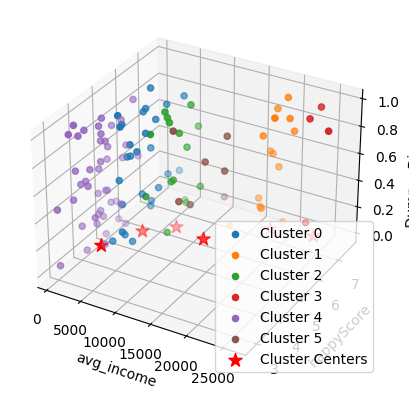

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data', 'clusters', and 'kmeans' (KMeans model) are defined

# Create a dummy third dimension for visualization purposes
z = np.random.rand(len(data['avg_income']))

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points with cluster-based coloring
for i in range(len(clusters)):
    cluster_data = data[['avg_income', 'happyScore']][labels == i]
    ax.scatter(cluster_data['avg_income'], cluster_data['happyScore'], z[labels == i], label=f'Cluster {i}')

# Scatter plot for cluster centers
ax.scatter(clusters[:, 0], clusters[:, 1], np.zeros(len(clusters)), color='red', s=100, marker='*', label='Cluster Centers')

ax.set_xlabel('avg_income')
ax.set_ylabel('happyScore')
ax.set_zlabel('Dummy Dimension')
ax.legend()
plt.show()

# Without Filtering, Sorting, and Normalizing:
Outliers: Extreme values in the data can skew the results. For example, a country with an exceptionally high average income or happiness score can dominate the clustering process, leading to less meaningful clusters.
Scale Differences: If the average income and happiness score are on different scales (e.g., income in thousands and happiness score between 1-10), the clustering algorithm might give more weight to the variable with the larger range, distorting the clusters.
Missing Values: Rows with missing values can cause errors or inaccuracies in the clustering process, as the algorithm requires complete data.
Unsorted Data: Without sorting, it might be harder to identify regional patterns or other specific trends in the data.


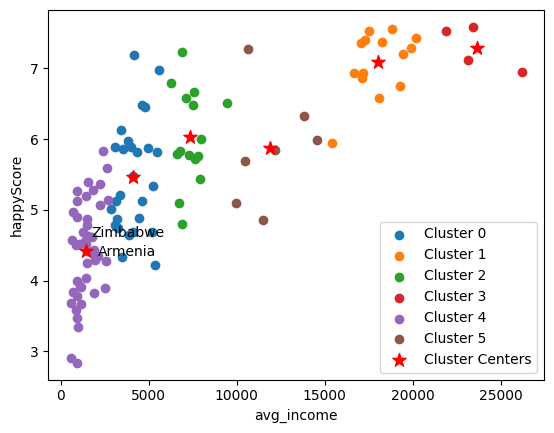

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Assuming 'data', 'clusters', and 'kmeans' (KMeans model) are defined

# Create a 2D scatter plot with cluster-based coloring
fig, ax = plt.subplots()
for i in range(len(clusters)):
    cluster_data = data[['avg_income', 'happyScore']][labels == i]
    ax.scatter(cluster_data['avg_income'], cluster_data['happyScore'], label=f'Cluster {i}')

# Scatter plot for cluster centers
ax.scatter(clusters[:, 0], clusters[:, 1], color='red', s=100, marker='*', label='Cluster Centers')
plt.text(data.iloc[0]['avg_income'],
         data.iloc[0]['happyScore'],
         data.iloc[0]['country'])
plt.text(data.iloc[-1]['avg_income'],
         data.iloc[-1]['happyScore'],
         data.iloc[-1]['country'])
ax.set_xlabel('avg_income')
ax.set_ylabel('happyScore')
ax.legend()
plt.show()

# With Filtering, Sorting, and Normalizing:
Filtered Outliers: By removing extreme values, the clustering process focuses on the majority of the data, leading to more meaningful and representative clusters.
Normalized Data: Normalizing ensures that both average income and happiness score contribute equally to the clustering process, preventing one variable from dominating due to scale differences.
Handled Missing Values: Removing or imputing missing values ensures that the clustering algorithm works with complete data, improving accuracy.
Sorted Data: Sorting by region or other relevant categories can help in identifying specific patterns or trends, making the analysis more insightful.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


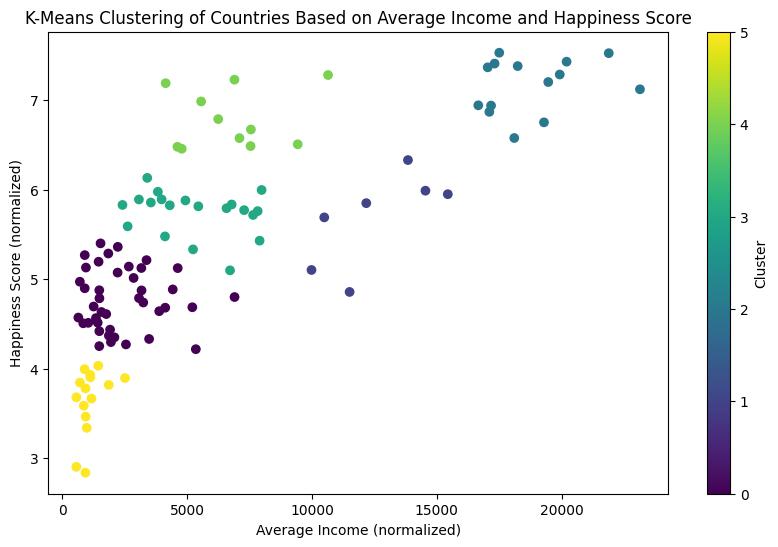

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

##Filter out outliers (e.g., countries with extremely high or low values)
#can adjust the threshold as needed
income_threshold = data['avg_income'].quantile(0.99)
happiness_threshold = data['happyScore'].quantile(0.99)
data = data[(data['avg_income'] < income_threshold) & (data['happyScore'] < happiness_threshold)]
data = data.sort_values(by='region')
# Normalize the data
scaler = StandardScaler()
data2 = scaler.fit_transform(data[['avg_income', 'happyScore']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster'] = kmeans.fit_predict(data2)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['avg_income'], data['happyScore'], c=data['cluster'], cmap='viridis')
plt.xlabel('Average Income (normalized)')
plt.ylabel('Happiness Score (normalized)')
plt.title('K-Means Clustering of Countries Based on Average Income and Happiness Score')
plt.colorbar(label='Cluster')
plt.show()
